In [130]:
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [3]:
customers = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-t-gataulin-20/project_1/olist_customers_dataset.csv')

In [4]:
items = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-t-gataulin-20/project_1/olist_order_items_dataset.csv')

In [5]:
orders = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-t-gataulin-20/project_1/olist_orders_dataset.csv')

In [5]:
items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
customers.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [9]:
customers_and_orders = orders.merge(customers, how = 'left', on = 'customer_id')

In [10]:
#Задание 1. Ко всем заказам джойним уникальные айди. Покупка засчитана, если заказ 
#доставлен/подтвержден/платеж одобрен/в процессе сборки.
#2872 человек с одной покупкой.
customers_and_orders.query("order_status == 'delivered' or order_status == 'shipped' or order_status == 'approved' or  order_status == 'processing'") \
    .groupby('customer_unique_id', as_index = False) \
    .agg({'order_id' : 'count'}) \
    .query("order_id > 1") \
    .shape

(2872, 2)

In [11]:
#Только отмененные или недоступные заказы.
canceled_orders = orders.query("order_status =='unavailable' or order_status == 'canceled'")

In [12]:
#Переводим все даты в формат datetime64
canceled_orders['order_purchase_timestamp'] = pd.to_datetime(canceled_orders['order_purchase_timestamp'])
canceled_orders['order_approved_at'] = pd.to_datetime(canceled_orders['order_approved_at'])
canceled_orders['order_delivered_carrier_date'] = pd.to_datetime(canceled_orders['order_delivered_carrier_date'])
canceled_orders['order_delivered_customer_date'] = pd.to_datetime(canceled_orders['order_delivered_customer_date'])
canceled_orders['order_estimated_delivery_date'] = pd.to_datetime(canceled_orders['order_estimated_delivery_date'])

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [13]:
#Оставляем только год и месяц в столбце планируемой доставки
canceled_orders['order_estimated_delivery_date'] = canceled_orders['order_estimated_delivery_date'].map(lambda x: 1000*x.year + x.month)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
#Среднее количество отмененных заказов в месяц = 47.5
canceled_orders.groupby('order_estimated_delivery_date', as_index = False) \
    .agg({'order_id' : 'count'}) \
    .mean().round(1)

order_estimated_delivery_date    2017276.3
order_id                              47.5
dtype: float64

In [15]:
#Заказ не оплачен.
canceled_orders.query("order_approved_at == 'NaT'").shape

(141, 8)

In [16]:
#Заказ не передан в логистическую службу.
canceled_orders.query("order_approved_at != 'NaT' and order_delivered_carrier_date == 'NaT'").shape

(1018, 8)

In [17]:
#Заказ не доставлен.
canceled_orders.query("order_approved_at != 'NaT' and order_delivered_carrier_date != 'NaT' and order_delivered_customer_date == 'NaT'").shape

(69, 8)

In [18]:
#Всего в отменённых заказах 1234 строки, сумма всех вычисленных раннее случаев = 1228. Где еще 6 строк = не понятно.

In [19]:
items_and_orders = items.merge(orders, how='left', on='order_id')

In [20]:
items_and_orders.sort_values('order_id').head(30)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,2017-05-17 03:55:27,2017-05-17 11:05:55,2017-05-22 13:44:35,2017-06-06 00:00:00
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,2017-12-10 12:10:31,2017-12-12 01:07:48,2017-12-18 22:03:38,2018-01-04 00:00:00
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,9ed5e522dd9dd85b4af4a077526d8117,delivered,2018-07-04 12:08:27,2018-07-05 16:35:48,2018-07-05 12:15:00,2018-07-09 14:04:07,2018-07-25 00:00:00
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,2018-03-20 18:35:21,2018-03-28 00:37:42,2018-03-29 18:17:31,2018-03-29 00:00:00
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40,351d3cb2cee3c7fd0af6616c82df21d3,delivered,2018-07-02 13:59:39,2018-07-02 14:10:56,2018-07-03 14:25:00,2018-07-04 17:28:31,2018-07-23 00:00:00


In [21]:
items_and_orders['order_purchase_timestamp'] = pd.to_datetime(items_and_orders['order_purchase_timestamp']).dt.day_name()

In [22]:
items_and_orders.groupby(['product_id', 'order_purchase_timestamp'], as_index = False) \
    .agg({'price' : 'count'}) \
    .groupby('product_id', as_index = False) \
    .agg({'price' : 'max', 'order_purchase_timestamp' : 'max'})

,product_id,price,order_purchase_timestamp
0,00066f42aeeb9f3007548bb9d3f33c38,1,Sunday
1,00088930e925c41fd95ebfe695fd2655,1,Tuesday
2,0009406fd7479715e4bef61dd91f2462,1,Thursday
3,000b8f95fcb9e0096488278317764d19,1,Wednesday
4,000d9be29b5207b54e86aa1b1ac54872,1,Tuesday
...,...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,1,Sunday
32947,fff81cc3158d2725c0655ab9ba0f712c,1,Monday
32948,fff9553ac224cec9d15d49f5a263411f,1,Friday
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,2,Tuesday


In [23]:
ex4 = customers_and_orders.query("order_status == 'delivered' or order_status == 'shipped' or order_status == 'approved' or  order_status == 'processing'")

In [24]:
ex4 = ex4[{'order_id', 'customer_id', 'order_purchase_timestamp'}]

In [25]:
ex4['order_purchase_rimestamp'] = pd.to_datetime(ex4['order_purchase_timestamp'])

In [26]:
ex4['new'] = ex4['order_purchase_rimestamp'].map(lambda x: 1000*x.year + x.month)

In [34]:
ex4.groupby(['customer_id', 'new'], as_index = False) \
    .agg({'order_purchase_timestamp' : 'count'}) \
    .query("order_purchase_timestamp > 1")
#Пользователей совершивших покупков более 1 раза нет, следовательно, в среднем покупок в неделю = количесвто недель в месяце.

,customer_id,new,order_purchase_timestamp


In [28]:
ex4['dinmonth'] = ex4['order_purchase_rimestamp'].dt.daysinmonth

In [29]:
ex4['answer'] = ex4.dinmonth/7

In [30]:
ex4[{'customer_id', 'answer'}]

,answer,customer_id
0,4.428571,9ef432eb6251297304e76186b10a928d
1,4.428571,b0830fb4747a6c6d20dea0b8c802d7ef
2,4.428571,41ce2a54c0b03bf3443c3d931a367089
3,4.285714,f88197465ea7920adcdbec7375364d82
4,4.000000,8ab97904e6daea8866dbdbc4fb7aad2c
...,...,...
99436,4.428571,39bd1228ee8140590ac3aca26f2dfe00
99437,4.000000,1fca14ff2861355f6e5f14306ff977a7
99438,4.428571,1aa71eb042121263aafbe80c1b562c9c
99439,4.428571,b331b74b18dc79bcdf6532d51e1637c1


In [31]:
#ЗАДАНИЕ 5

In [165]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-t-gataulin-20/project_1/olist_orders_dataset.csv')

In [166]:
df = df.merge(customers, how='left', on='customer_id')

In [167]:
df = df[{'order_id', 'customer_unique_id', 'order_status', 'order_purchase_timestamp'}]

In [168]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], format='%Y-%m-%dT')

In [169]:
df['qq'] = df['order_purchase_timestamp'].map(lambda x: 1000*x.year + x.month)
a = df.qq.unique()
a.sort()
a
#Полный год - только 2017, значит анализируем с января по декабрь 2017 года.

array([2016009, 2016010, 2016012, 2017001, 2017002, 2017003, 2017004,
       2017005, 2017006, 2017007, 2017008, 2017009, 2017010, 2017011,
       2017012, 2018001, 2018002, 2018003, 2018004, 2018005, 2018006,
       2018007, 2018008, 2018009, 2018010])

In [170]:
df['date'] = df['order_purchase_timestamp'].dt.to_period('M')


In [171]:
df = df[{'customer_unique_id', 'order_id', 'date', 'order_status'}]

In [172]:
df = df.query("order_status == 'delivered' or order_status == 'shipped' or order_status == 'approved' or  order_status == 'processing'")

In [173]:
first_date = df.groupby('customer_unique_id', as_index = False) \
    .agg({'date' : 'min'})

In [8]:
df = df.merge(first_date, how='left', on='customer_unique_id')

NameError: name 'df' is not defined

In [175]:
df = df.rename(columns={'date_x' : 'purchase_date', 'date_y' : 'first_purchase'})

In [176]:
df.first_purchase = df.first_purchase.map(str)
df.purchase_date = df.purchase_date.map(str)

In [177]:
df.first_purchase = pd.to_datetime(df['first_purchase'])
df.purchase_date = pd.to_datetime(df['purchase_date'])

In [178]:
df['delta'] = df.purchase_date-df.first_purchase

In [6]:
def month_diff(x, y):
    end = x.dt.to_period('M').view(dtype='int64')
    start = y.dt.to_period('M').view(dtype='int64')
    return end-start

In [180]:
df['delta'] = month_diff(df.purchase_date, df.first_purchase)

In [181]:
df = df.query("first_purchase < '2018-01-01' and first_purchase > '2016-12-12'")

In [266]:
df1 = df.groupby(['first_purchase', 'delta'], as_index = False) \
    .agg({'order_id' : 'count'}) \
    .rename(columns={'order_id' : 'purchases'})

In [220]:
df2 = df1.pivot(index='first_purchase', columns='delta', values='purchases')

In [262]:
for i in range(12):
    df2.loc['2017-12-01'] = (df2.loc['2017-12-01'] / df2.loc['2017-12-01'][0])*100

In [267]:
df2
#наибольший retenrion на 3 месяц, у людей пришедших в мае.

delta,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
first_purchase,,,,,,,,,,,,,,,,,,,
2017-01-01,100.0,0.387597,0.258398,0.129199,0.387597,0.129199,0.387597,0.129199,0.129199,NaN,0.387597,0.129199,0.645995,0.387597,0.129199,0.129199,0.258398,0.387597,0.129199
2017-02-01,100.0,0.234742,0.293427,0.117371,0.410798,0.117371,0.234742,0.176056,0.117371,0.176056,0.117371,0.293427,0.117371,0.176056,0.117371,0.058685,0.058685,0.293427,NaN
2017-03-01,100.0,0.536810,0.345092,0.460123,0.345092,0.153374,0.153374,0.306748,0.345092,0.076687,0.345092,0.115031,0.230061,0.115031,0.153374,0.230061,0.076687,0.153374,NaN
2017-04-01,100.0,0.640478,0.256191,0.213493,0.298890,0.256191,0.384287,0.298890,0.298890,0.170794,0.256191,0.085397,0.042699,0.042699,0.085397,0.085397,0.170794,NaN,NaN
2017-05-01,100.0,0.500695,0.500695,0.389430,0.305981,0.389430,0.472879,0.139082,0.250348,0.305981,0.250348,0.333797,0.278164,0.027816,0.222531,0.278164,NaN,NaN,NaN
2017-06-01,100.0,0.444444,0.380952,0.380952,0.253968,0.349206,0.349206,0.222222,0.126984,0.222222,0.317460,0.317460,0.158730,0.126984,0.222222,NaN,NaN,NaN,NaN
2017-07-01,100.0,0.565989,0.334448,0.231541,0.334448,0.205814,0.308721,0.102907,0.205814,0.282995,0.205814,0.308721,0.128634,0.257268,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,0.692455,0.382044,0.262655,0.358166,0.573066,0.286533,0.262655,0.143266,0.143266,0.238777,0.191022,0.119389,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,0.677966,0.532688,0.387409,0.435835,0.314770,0.217918,0.242131,0.290557,0.169492,0.266344,0.072639,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#6 Задание

In [7]:
rfm = orders.merge(customers, how='left', on='customer_id')

In [8]:
rfm = rfm.merge(items, how='left', on='order_id')

In [9]:
rfm = rfm.query("order_status == 'delivered' or order_status == 'shipped' or order_status == 'approved' or  order_status == 'processing'")

In [10]:
rfm = rfm[{'customer_unique_id', 'price', 'order_purchase_timestamp'}]

In [11]:
rfm.head(5)

,price,customer_unique_id,order_purchase_timestamp
0,29.99,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33
1,118.70,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37
2,159.90,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49
3,45.00,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06
4,19.90,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39


In [12]:
rfm.dtypes

price                       float64
customer_unique_id           object
order_purchase_timestamp     object
dtype: object

In [13]:
rfm = rfm.rename(columns={'order_purchase_timestamp' : 'date', 'customer_unique_id' : 'customer'})

In [14]:
rfm.head(5)

,price,customer,date
0,29.99,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33
1,118.70,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37
2,159.90,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49
3,45.00,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06
4,19.90,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39


In [15]:
rfm['date'] = pd.to_datetime(rfm['date'], format='%Y-%m')

In [16]:
first = rfm.groupby('customer', as_index = False) \
    .agg({'date' : 'min'})

In [17]:
rfm = rfm.merge(first, how='left', on='customer')

In [18]:
rfm = rfm.rename(columns={'date_x' : 'date', 'date_y' : 'first_date'})

In [19]:
last = rfm.groupby('customer', as_index = False) \
    .agg({'date' : 'max'})
rfm = rfm.merge(last, how='left', on='customer')
rfm = rfm.rename(columns={'date_x' : 'date', 'date_y' : 'last_date'})

In [20]:
total_sum = rfm.groupby('customer', as_index = False) \
    .agg({'price' : 'sum'})
rfm = rfm.merge(total_sum, how='left', on='customer')

In [21]:
rfm = rfm.rename(columns={'price_x' : 'price', 'price_y' : 'total_sum'})

In [22]:
total_purch = rfm.groupby('customer', as_index = False) \
    .agg({'price' : 'count'})
rfm = rfm.merge(total_purch, how='left', on='customer')
rfm = rfm.rename(columns={'price_x' : 'price', 'price_y' : 'total_purch'})

In [46]:
rfm.head(5)

,price,customer,date,first_date,last_date,total_sum,total_purch,now_date,delta
0,29.99,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-09-04 11:26:38,2017-10-02 10:56:33,65.38,2,2018-09-03,12
1,118.70,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,2018-07-24 20:41:37,2018-07-24 20:41:37,118.70,1,2018-09-03,2
2,159.90,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,2018-08-08 08:38:49,2018-08-08 08:38:49,159.90,1,2018-09-03,1
3,45.00,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,2017-11-18 19:28:06,2017-11-18 19:28:06,45.00,1,2018-09-03,10
4,19.90,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39,2018-02-13 21:18:39,2018-02-13 21:18:39,19.90,1,2018-09-03,7


In [24]:
current_datetime = datetime.now().date()

In [25]:
rfm['now_date'] = current_datetime

In [45]:
rfm['delta'] = month_diff(rfm.now_date, rfm.first_date)

In [31]:
rfm['now_date'] = pd.to_datetime(rfm['now_date'])

In [37]:
rfm['last_date'].max()
#2018-09-03 последняя дата покупки. Будем считать, что сегодня - 3 сентября 2018.

Timestamp('2018-09-03 09:06:57')

In [43]:
rfm['now_date'] = pd.to_datetime('2018-09-03')

In [49]:
rfm['delta'].max()

24

In [48]:
rfm['delta'].min()

1

In [57]:
def month_diff2(x, y):
    end = x.dt.to_period(freq = 'd').view(dtype='int64')
    start = y.dt.to_period(freq = 'd').view(dtype='int64')
    return end-start

In [69]:
rfm['delta3'] = (rfm.now_date - rfm.last_date).dt.days

In [70]:
rfm_final = rfm[{'customer', 'total_sum', 'total_purch', 'delta3'}]

In [71]:
rfm_final = rfm_final.rename(columns={'total_sum' : 'monetary', 'total_purch' : 'frequency', 'delta3' : 'recency'})

In [76]:
rfm_final = rfm_final.drop_duplicates(subset = ['customer'])

In [77]:
rfm_final

,monetary,frequency,recency,customer
0,65.38,2,335,7c396fd4830fd04220f754e42b4e5bff
1,118.70,1,40,af07308b275d755c9edb36a90c618231
2,159.90,1,25,3a653a41f6f9fc3d2a113cf8398680e8
3,45.00,1,288,7c142cf63193a1473d2e66489a9ae977
4,19.90,1,201,72632f0f9dd73dfee390c9b22eb56dd6
...,...,...,...,...
111737,72.00,1,542,6359f309b166b0196dbf7ad2ac62bb5a
111738,174.90,1,208,da62f9e57a76d978d02ab5362c509660
111739,205.99,1,371,737520a9aad80b3fbbdad19b66b37b30
111740,359.98,2,237,5097a5312c8b157bb7be58ae360ef43c


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


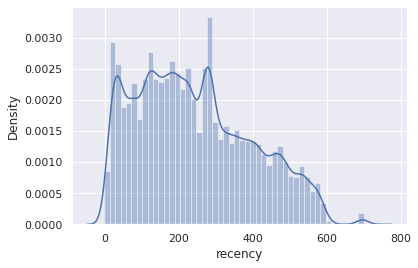

In [78]:
import seaborn as sns, numpy as np
sns.set_theme();
ax = sns.distplot(rfm_final.recency)

In [93]:
#По частоте покупки делим на:
#менее 200 дней
#200-400 дней
#и более 600

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


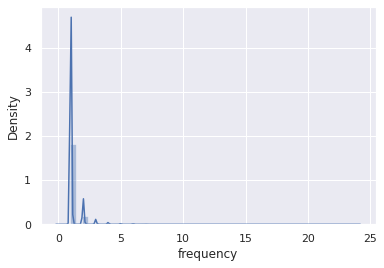

In [79]:
ax = sns.distplot(rfm_final.frequency)

In [94]:
#Судя по всему, наши товары покупают не часто, следовательно делим на класnеры: 
# 1 покупка.
# 2 покупки - пользователь ,оценил нашу продукцию. И покупаю такой же товар, сделал выбор в пользу нас.
# 3 и более покупки - пользователь полностью доверяет нам и любит нашу продукцию.

In [107]:
rfm_final.query("monetary > 100 and monetary < 300")

,monetary,frequency,recency,customer
1,118.70,1,40,af07308b275d755c9edb36a90c618231
2,159.90,1,25,3a653a41f6f9fc3d2a113cf8398680e8
5,147.90,1,420,80bb27c7c16e8f973207a5086ab329e2
8,149.99,1,400,299905e3934e9e181bfb2e164dd4b4f8
9,198.00,2,474,f2a85dec752b8517b5e58a06ff3cd937
...,...,...,...,...
111728,149.90,1,72,e930b415f39ab827ea66de80a9d36a22
111731,142.50,1,310,1a3b8f1d0782ebedbcf220a96cbc1655
111736,139.90,1,556,831ce3f1bacbd424fc4e38fbd4d66d29
111738,174.90,1,208,da62f9e57a76d978d02ab5362c509660


In [105]:
rfm_final.query("monetary < 100")

,monetary,frequency,recency,customer
0,65.38,2,335,7c396fd4830fd04220f754e42b4e5bff
3,45.00,1,288,7c142cf63193a1473d2e66489a9ae977
4,19.90,1,201,72632f0f9dd73dfee390c9b22eb56dd6
6,59.99,1,474,932afa1e708222e5821dac9cd5db4cae
7,19.90,1,587,39382392765b6dc74812866ee5ee92a7
...,...,...,...,...
111730,55.00,1,182,324a22205906aa2612a33e63c00ca8bb
111732,55.90,1,256,a49e8e11e850592fe685ae3c64b40eca
111733,69.01,2,333,c716cf2b5b86fb24257cffe9e7969df8
111737,72.00,1,542,6359f309b166b0196dbf7ad2ac62bb5a


In [108]:
rfm_final.query("monetary > 300")

,monetary,frequency,recency,customer
16,1355.90,2,243,6e26bbeaa107ec34112c64e1ee31c0f5
39,445.00,1,93,5f7d7732b351ce851a158528581af05f
42,339.00,1,282,3e4fd73f1e86b135b9b121d6abbe9597
55,369.00,1,261,38cad70d154a4dcc42b598d5c01f7ef1
67,318.00,2,133,0e764fc1a13e47e900c3d59a989753e8
...,...,...,...,...
111708,399.99,1,470,b0f75567787a7483aadf695f5021e881
111713,439.65,1,154,0cc2c169569fd06473481e06325a5321
111714,712.00,2,388,fb9310710003399b031add3e55f34719
111735,370.00,1,583,e03dbdf5e56c96b106d8115ac336f47f


In [109]:
#Деление по общему чеку:
#300+
#100-300
#100-

In [123]:
def RScoreMonetary(x):
    if x > 300:
        return 3
    elif x <=300 and x >=100:
        return 2
    else:
        return 1

In [121]:
def RScoreFrequency(x):
    if x >= 3:
        return 3
    elif x == 2:
        return 2
    else:
        return 1

In [122]:
def RScoreRecency(x):
    if x > 600:
        return 1
    elif x <= 400 and x >= 200:
        return 2
    else:
        return 3

In [113]:
segmented_rfm = rfm_final

In [124]:
segmented_rfm['m_quartile'] = segmented_rfm['monetary'].apply(RScoreMonetary)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [125]:
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScoreRecency)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [126]:
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(RScoreFrequency)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [128]:
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [129]:
segmented_rfm

,monetary,frequency,recency,customer,m_quartile,r_quartile,f_quartile,RFMScore
0,65.38,2,335,7c396fd4830fd04220f754e42b4e5bff,1,2,2,221
1,118.70,1,40,af07308b275d755c9edb36a90c618231,2,3,1,312
2,159.90,1,25,3a653a41f6f9fc3d2a113cf8398680e8,2,3,1,312
3,45.00,1,288,7c142cf63193a1473d2e66489a9ae977,1,2,1,211
4,19.90,1,201,72632f0f9dd73dfee390c9b22eb56dd6,1,2,1,211
...,...,...,...,...,...,...,...,...
111737,72.00,1,542,6359f309b166b0196dbf7ad2ac62bb5a,1,3,1,311
111738,174.90,1,208,da62f9e57a76d978d02ab5362c509660,2,2,1,212
111739,205.99,1,371,737520a9aad80b3fbbdad19b66b37b30,2,2,1,212
111740,359.98,2,237,5097a5312c8b157bb7be58ae360ef43c,3,2,2,223


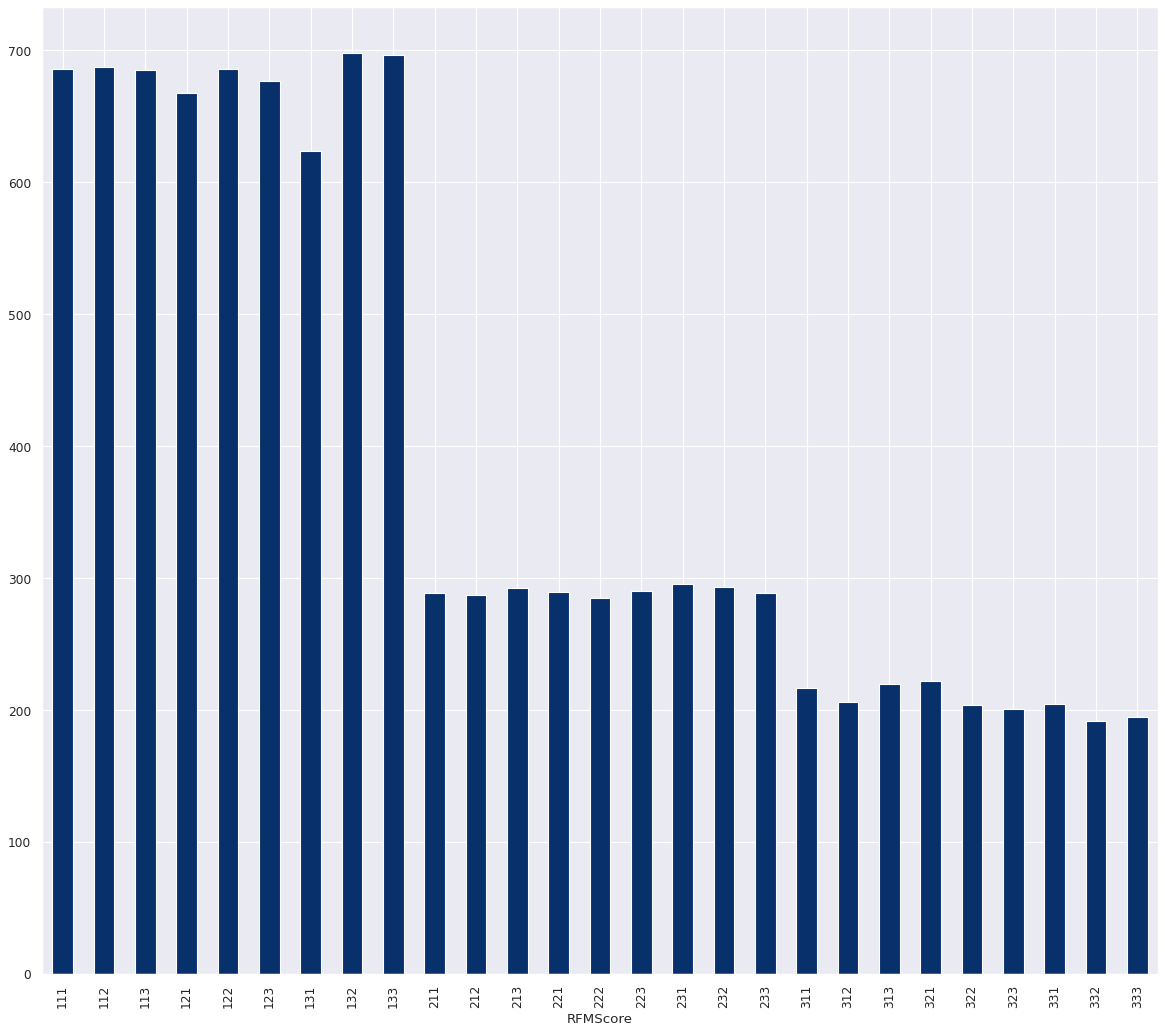

In [132]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
segmented_rfm.groupby('RFMScore').agg('recency').mean().plot(kind='bar', colormap='Blues_r')
plt.show()

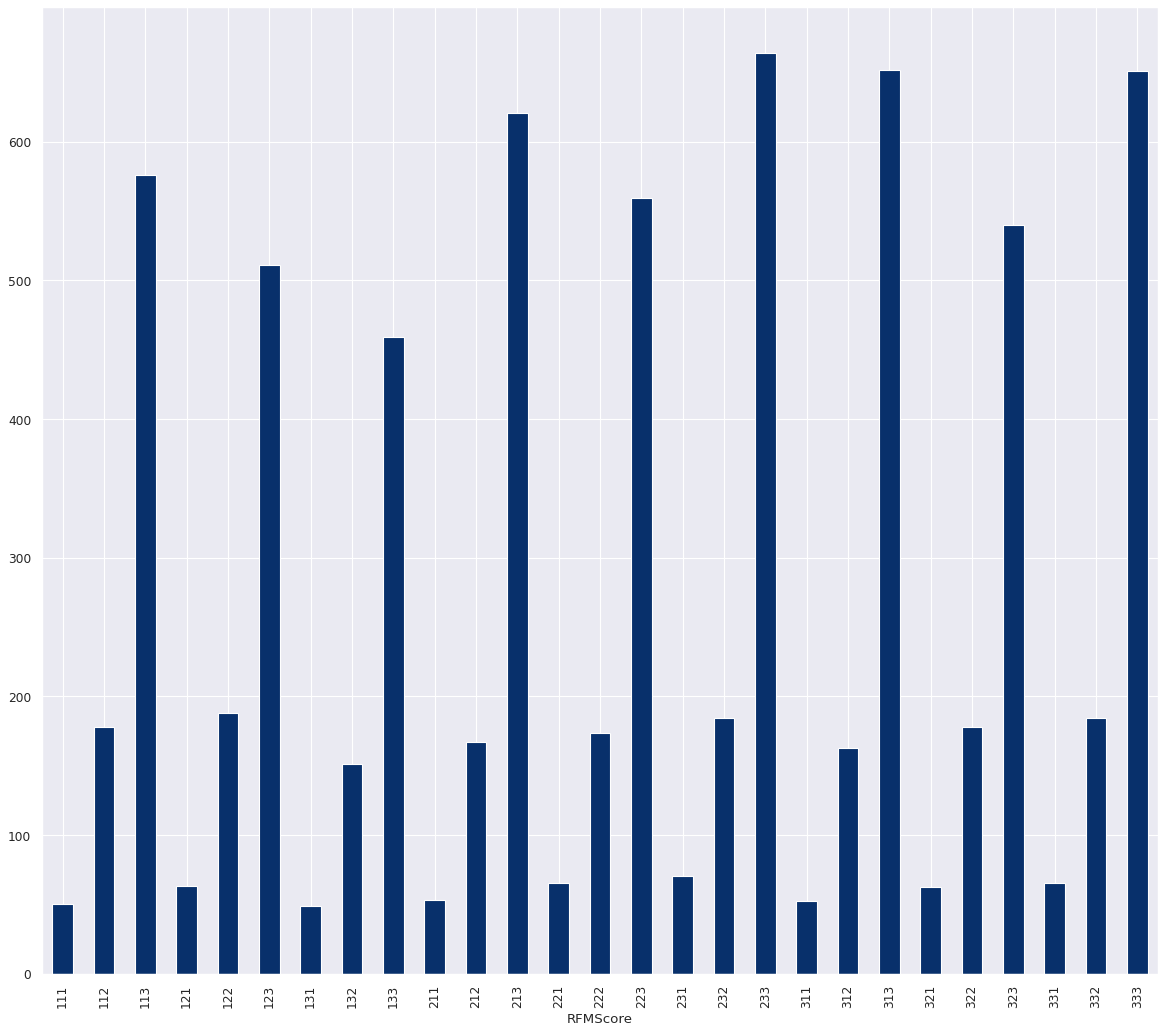

In [133]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
segmented_rfm.groupby('RFMScore').agg('monetary').mean().plot(kind='bar', colormap='Blues_r')
plt.show()

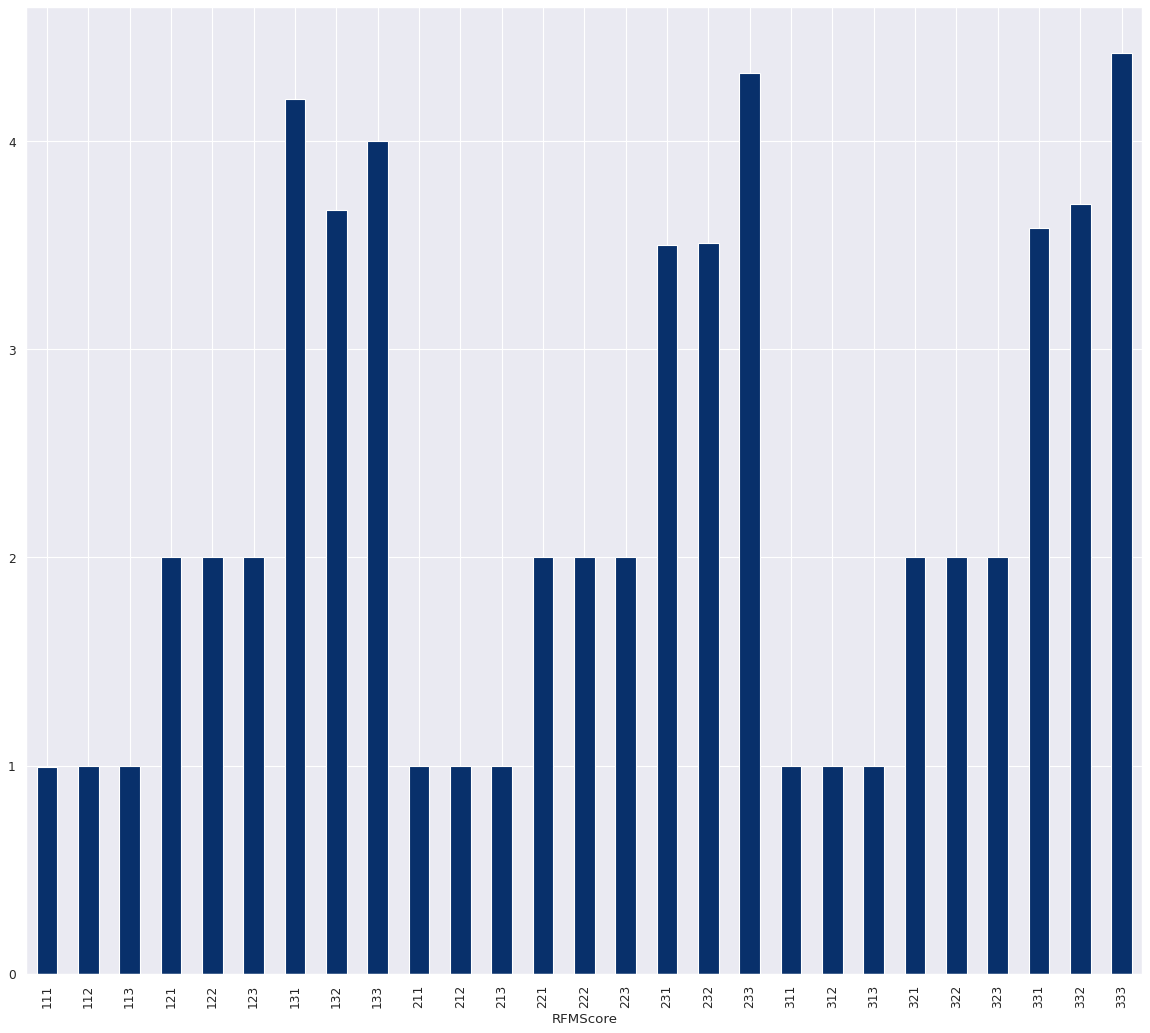

In [134]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
segmented_rfm.groupby('RFMScore').agg('frequency').mean().plot(kind='bar', colormap='Blues_r')
plt.show()